In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
sns.set_theme() # Apply the default theme

import math
import scipy.stats as st
import statsmodels.api as sm
from IPython import display

# Intro

- [Random variable - Penn State STAT500](https://online.stat.psu.edu/stat500/lesson/3/3.1)
- [Random variable - Yales stats](http://www.stat.yale.edu/Courses/1997-98/101/ranvar.htm)
- [The probability distribution of discrete random variable - stats by libretexts](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/04%3A_Discrete_Random_Variables/4.02%3A_Probability_Distributions_for_Discrete_Random_Variables)

## Random Variable

### Definition

A **random variable**, usually written as $X$, is a variable whose possible values are numerical outcomes of a random phenomenon. 

### Population vs Sample

- **Population** is the collection of all possible observations of a random variable;
- **Sample** is the collection of randomly selected observations for a fixed size $n$.

### Discrete vs Continuous

- When a random variable can assume only a countable, sometimes infinite, number of values, it's **discrete**;

- When a random variable can assume an uncountable number of values in a line interval, it's **continuous**.



## Probability Function

A **probability function** is a mathematical function that provides probabilities for the possible outcomes of the random variable $X$, it's typically denoted as $f(x)$. 

A **cumulative distribution function** (CDF), usually denoted as $F(x)$, is a function that gives the probability that the random variable $X$, is less than or equal to the value $x$.


## Random Probability Distribution and Histogram

The **random probability distribution** describes how the probabilities are distributed over the values of the random variable.

We can use **histogram** to visualize the probability distribution of $X$, where
- the random variable $X$ is the **x-axis** and 
- the probability function $f(x)$ is the **y-axis**.


## Summary

||Discrete|Continuous|
|:---|:---:|:---:|
|Definition|when $X$ can assume only countable, sometimes infinite, number of values|When $X$ can assume an uncountable number of values in a line interval|
|Probability Functions<br>$f(x)$|PMF<br>the probability that $X$ is equal to $x$ |PDF<br>the probability function which is used to draw the curve of probability distribution|
||$$f(x)=P(X=x)$$|$$f(x)\neq P(X=x)$$instead<br>$$P(X=x)=0$$|
|CDF<br>$F(x)$|Discrete CDF can be defined as:<br>$$F(x) = P(X\leq x)$$|Discrete CDF can be defined as:<br>$$F(x) = P(X\leq x)=P(X<x)$$|
||It's calculated by summing PMFs|It's calculated by integrating the PDFs|
||$$F(x)=\sum_{x_k \leq x}P(X=x_k)$$|$$F(x)=\int_{-\infty}^x f(x)dx$$|
||The sum of all the probabilities of all the possible outcomes of an experiment is equal to 1|The area under the curve is equal to 1|
||$$\sum_{x\in S} P(X=x)=1$$|$$F(x)=\int_{-\infty}^{\infty} f(x)dx=1$$|


# Discrete Random Variable

## Definition

A **discrete random variable** $X$ can take on countable number of distinct values such as 0,1,2,3,4,......... **Discrete random variables** are usually (but not necessarily) <u>counts</u>. 

The **probability distribution of a discrete random variable** is a list of each possible value of $X$ together with the **probability** that $X$ takes that value in one trial of the experiment. 


## Discrete Probability / PMF

The probability that a discrete random variable $X$ takes on a particular value $x$, that is, $P(X=x)$, or denoted as $f(x)$,  is typically called **probability mass function** (PMF). Note that each $P(X=x)$ must be between $0$ and $1$:

$$0\leq P(X=x)\leq 1$$

For example, let $X$ be the number of sibilings of the students in a school, which is $X = {0,1,2,3}$. As $X$ contains finite number of possible values, it's a **discrete random variable**. Its probability distriubtion is:

|x|0|1|2|3|
|---|---|---|---|---|
|P(X=x)|$$\frac{100}{500}$$|$$\frac{180}{500}$$|$$\frac{120}{500}$$|$$\frac{100}{500}$$|


## Discrete CDF

The **cumulative distribution function (CDF)** of a discrete random variable is defined as:

$$\boxed{F(x) = P(X\leq x)}$$

- which is calculated by summing the PDFs:

$$\boxed{\begin{split}
    F(x) &= P(X\leq x)\\
    &= \sum_{x_k \leq x}P(X=x_k)
    \end{split}}$$

- The sum of all probabilities of an experiment is $1$
    
    $$\boxed{\sum_{x\in S}P(X=x)=1}$$ 
    
    where $S$ is the "**sample space**". It's the set of all values of $X$ with a non-zero probability, i.e. it's a set of things that can happen.  

### Example: At Least Three Probability

How if roll a die for 5 times, what is the probability of rolling at least three 6s?

Let $X$ be the number of 6s in 5 rolls:

$$\begin{split}
P(X\geq 3) &= P(X=3) + P(X=4) + P(X=5)\\
&= {5\choose 3}0.5^3\cdot 0.5^{2}+{5\choose 4}0.5^4\cdot 0.5^{1}+{5\choose 5}0.5^5\cdot 0.5^{0}\\
&\approx0.3+0.16+0.03\\
&\approx0.5
\end{split}
$$

In [6]:
# Use `np.random.binomial` to simulate probability distriubtion
n, p, k = 5, 0.5, 10000
x = np.unique(np.random.binomial(n,p,k), return_counts=True)
pd.DataFrame({'probability': np.around(x[1]/k,2)}).transpose()

,0,1,2,3,4,5
probability,0.03,0.16,0.31,0.32,0.16,0.03


In [9]:
# Use `scipy.stats.binom()` to calculate pmf
x = st.binom(n,p)

# sum pmfs to get cdf
round(x.pmf(3) + x.pmf(4) + x.pmf(5),2)

0.5

## Expected Value

The **expected value** of a random variable is the numeraical value we expect to get from a random sample. For example, if we sample an adult male at random, then we expect his height to be around the population mean $\mu$.

It's also considered as the "long-run" average of the distribution outcomes.
- in other words, it's a weighted sum of the outcomes (weighted by probability)
- it is synonym to the "mean"
- With large enough sample size $n$, the expected value will approach the population mean

|Discrete Random Variable|Population|
|---|---|
|$$E(X)= \sum_{x\in S}x \cdot P(X=x)$$|$$\mu = \sum x \cdot \frac{1}{n}$$|


## Variance

The **vairance** of a distribution is a measure of uncertainty in each outcome. It's opposite to the meaning of **precision**.

|Discrete Random Variable |Population|
|:---:|:---:|
|$$V(X)= \sum_{x\in S}(x-\mu)^2 \cdot P(X=x)$$ or <br>$$V(X) = E(X-E(X))^2 = E(X^2) - E(X)^2$$|$$ \sigma^2 = \sum(x-\mu)^2 \cdot \frac{1}{n}$$|


## Median

The median of a distribution is an x-value such that at least half is no more than it, and at least half is no less than it:

$$\tilde{X} = \{x | P(X\leq x) \geq 0.5\ and\ P(X\geq x) \geq 0.5\}$$

## Examples using General Formulas


### Parameters of a Uniform Distribution

We have observed the PMF for the number of points scored by the Winterhawks team as follows:

|Score|0|1|2|3|4|5|
|---|---|---|---|---|---|---|
|Probability|.1|.1|.2|.4|.1|.1|

What's the **expected value**, **variance** and **median**?

In [115]:
x = np.array([0,1,2,3,4,5])
p = np.array([.1, .1, .2, .4, .1, .1])

# the expected value
ev = (x*p).sum()

# the variance
var = ((x-ev)**2 * p).sum()

# the median
i = np.argmax(p.cumsum()>=.5)
if np.sum(p[:i+1]) == .5:  
    m = x[:i+2].sum()/2
else:
    m = x[i]
    
print(f"{ev}, {var:.2f}, {m}")

2.6, 1.84, 3


### Parameters of a Binomial Distribution

Let $X$ be the number of getting heads from flipping a fair coin for 3 times. This is a **binomial random variable**, denoted as $X\sim Bin(n=3,p=0.5)$. 

The probabilities of getting $x$ heads can be computed using **Binomial PMF** formula:

$$\boxed{P(X=x)={n\choose x}p^{x}(1-p)^{n-x}}$$

- getting 0 heads: $P(X=0)= {3 \choose 0}0.5^0 0.5^{3-0} = 0.5^3$
- getting 1 heads: $P(X=1)= {3 \choose 1}0.5^1 0.5^{3-1} = 3\times 0.5 \times 0.5^2 = 3\times 0.5^3$
- getting 2 heads: $P(X=2)= {3 \choose 2}0.5^2 0.5^{3-2} = 3\times 0.5^2 \times 0.5 = 3\times 0.5^3$
- getting 3 heads: $P(X=3)= {3 \choose 3}0.5^3 0.5^{3-3} = 0.5^3$

What's the **expected value**, **variance** and **median** of $X$?

In [116]:
import numpy as np

# all possible events of X (the sample space)
x = np.array([0,1,2,3])

# the probability of all possible events: P(X=x)
p = np.array([.5**3, 3*.5**3, 3*.5**3, .5**3])

# the expected value (mean)
ev = (x*p).sum()

# the variance
var = ((x-ev)**2 * p).sum()

# the median
i = np.argmax(p.cumsum()>=.5)
if np.sum(p[:i+1]) == .5:  
    m = x[:i+2].sum()/2
else:
    m = x[i]

print(f"mean: {ev}, variance: {var:.2f}, median: {m}")

mean: 1.5, variance: 0.75, median: 1.5


## Example Discrete Distributions

Well-known discrete probability distributions used in statistical modeling include:

- Bernoulli
- Binomial
- Geometric
- Poisson etc.

### Bernoulli

In an experiment, we will roll a fair dice ($n=1$ and $p=0.5$). Let $X$ be the probability of getting head in one trial, which will have only 2 possible outcomes: $X=\{0,1\}$. This is an **Bernoulli random variable**, which counts the "probability of success in one trial", denoted as $X\sim B(1, p)$

- Note that **Bernoulli** is the special case of **Binomial** with $n=1$
- The **probability mass function** of X ($X={0,1}$) is:

$$\boxed{P(X=x) = \begin{cases}
          p,\text{ if }x=1\\
          1-p,\text{ if }x=0
          \end{cases}  }
$$
    
    which can also be expressed as

$$\boxed{p^x (1-p)^{1-x}}$$


- The expected mean and variance of **Bernoulli** is:
    - $\boxed{\mu = p}$ and
    - $\boxed{\sigma^s = p(1-p)}$

Expected value:p=0.5
Expected std:sqrt(p(1-p))=0.5


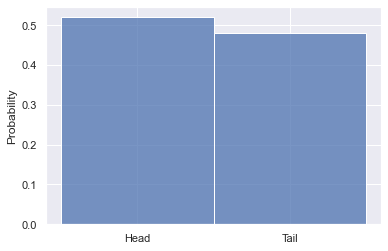

In [117]:
# Repeat the experiment many times (k) to simulate the population 
n,p, k = 1, .5, 1000
rvs = np.random.binomial(n,p,k)
print(f'Expected value:p={rvs.mean():.1f}')
print(f'Expected std:sqrt(p(1-p))={rvs.std():.1f}')

# Visualize
sns.histplot(rvs, discrete=True, stat='probability')
plt.xticks(ticks=[0,1], labels=['Head', 'Tail'])
plt.show()

In [118]:
np.sqrt(p*(1-p))

0.5

### Binomial

In an experiment, you will toss 3 fair coins. Let $X$ be the number of heads you get from this experiment, this is **binomial random variable** which counts "the number of successes in $n$ identical and independent trials", denoted as $X\sim Bin(n,p)$

We will have:

- $n=3$ (number of trails)
- the probability of getting head is $p=0.5$
- $X = \{0,1,2,3\}$, which are all the possible numbers of heads we can get after 3 tosses
- The probability of each possible value $x$ is: 

    $$\boxed{P(X=x) = {n\choose x}p^{x}(1-p)^{n-x}}$$
    
    - Note that ${n\choose x}$ is the **binomial coefficient**, the number of all possible results that satisfies $X=x$. 

- We can expect the **binomial probability distribution** to have:
    - $\boxed{\mu = np}$ and 
    - $\boxed{\sigma^2 = np(a-p)}$




Expected value:np=1.5
Expected std:sqrt(np(1-p))=0.9


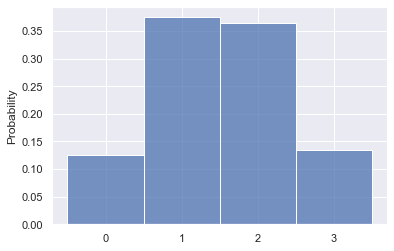

In [119]:
# Repeat the experiment many times (k) to simulate population
n, p, k = 3, 0.5, 1000 
rvs = np.random.binomial(n,p,k)
print(f'Expected value:np={rvs.mean():.1f}')
print(f'Expected std:sqrt(np(1-p))={rvs.std():.1f}')

# Visualize
sns.histplot(rvs, discrete=True, stat='probability')
plt.xticks([0,1,2,3])
plt.show()

In [120]:
round(np.sqrt(n*p*(1-p)),1)

0.9

### Expected Payout of Bernoulli

Suppose you are playing a game of chance in which you can choose 5 numbers from `0,1,2,3,4,5,6,7,8,9`. A computer randomly selects 5 numbers for you **with replacement**. 

You pay $\$2$ to play and could win $\$100,000$ if you match 5 numbers in order. Over the long term, what is your **expected** profit of playing the game?


**Solution**

Let $X$ be **all possible payouts** in each game: $[-2, 100000]$


- The probability of getting a correct number is equally the same as:

    $$p = \frac{1}{10}$$

- The probability of 'success' (getting 5 correct numbers in order):

    $$p(\text{success}) = (\frac{1}{10})(\frac{1}{10})(\frac{1}{10})(\frac{1}{10})(\frac{1}{10})=10^{-5}=0.00001$$


- Therefore, the probability of 'loss' is:

    $$p(\text{loss}) = 1-p(\text{success}) = 1-0.00001 = 0.99999$$
    
Now we can compute **the expected value for each payout** ($x$) as follows:

||$x$|$P(x)$|$EV=x*P(x)$|
|:---|:---|:---|:---|
|Loss|-2|0.99999|(-2)(0.99999)=-1.99998|
|Success|100000|0.00001|(10000)(0.00001)=1|


# Continuous Random Variable

## Definition

A **continuous random variable** is one which takes an uncountable number of possible values in a line interval. Continuous random variables are usually <u>measurements</u>. 

For example, the length of time a commuter just arriving at a bus stop has to wait for the next bus. If buses run every 30 minutes without fail, then the set of possible values of $X$ is the interval denoted $[0,30]$, which could assume the values such as $0.002$, $3.2$ or $29.999$.




## Continuous Probability

The graph of a continuous probability distribution is a curve. Probability is represented by <u>area</u> under the curve. 

- The curve is called the **probability density function** (PDF), we use $f(x)$ to preresent the function. 
- **Area under the curve** is given by a different function called **cumulative distribution function** (CDF).


## PDF

### Definition

A **probability density function** (PDF) describes the probability of the value of a continuous random variable falling within a range. If the random variable can only have specific values (like throwing dice), a **PMF** would be used to describe the probabilities of the outcomes:

It's important to note that we estimate **PDF** value using the corresponding distribution $f(x)$ formula, which is contrary to **discrete probability function**, $f(x) \neq P(X=x)$. Instead, $P(X=x)=0$, Therefore, we can observe the **PDF** $f(x)>1$ sometimes. Detailed explanation can be found [here](https://math.stackexchange.com/a/1720077)

### PDF vs PMF

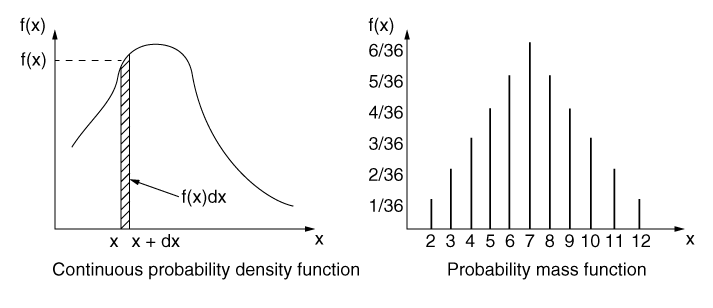

In [ ]:
display.Image('img/pdf_fx.png', width=500)

### Histogram for PMF and PDF

[Best explanation on difference among PMF, PDF and Continuous CDF (the probability)](https://www.allaboutcircuits.com/technical-articles/normal-distribution-understanding-histograms-probability/):

Note the difference between the two names: 
- The y-axis of a **probability mass function** indicates the mass, as in the amount, of probability. 
- The y-axis of a **probability density function** indicates the density of probability relative to the x-axis; we have to integrate this density along the horizontal axis in order to generate an amount of probability:

 
[histogram and desnity plot](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0#:~:text=the%20density%20plot.-,Density%20Plots,-First%2C%20what%20is): the y-axis of a density plot is the PDF of x, how PDF differs from CDF ("probability")

## Continuous CDF


### Definition 

The **CDF** for a **continuous random variable** is defined as 


$$F(x) = P(X\leq x) = P(X<x)$$


- which is calculated by integrating PDFs:

$$\boxed{F(x)=\int_{-\infty}^x f(x)dx}$$


- The entire area under the curve is euqal to 1:

   $$\boxed{P(x \in (-\infty, \infty) = \int_{-\infty}^{\infty} f(x)dx = 1}$$
   

### Alternate Definition

We can also use the following denotation:

- The probability that the random variable $x$ will be in ther ange $a\leq x\leq b$ is give by:

    $$\boxed{P(a\leq x\leq b) = \int_a^b f(x)dx}$$
    

- Note $P(a < x < b) = P(a\leq x \leq b)$, because probability is equal to area.



## Expected Value and Variance

The **expected value** and the **variance** have the same meaning as they do for the **discrete random variable**. Although, the continuous parameters use equations that are derived from integration.

- **Expected value**: 
$$\boxed{\mu = \int_{-\infty}^{\infty} x f(x) dx}$$

- **variance**: 
$$\boxed{\sigma^2 = \bigg(\int_{-\infty}^{\infty} x^2 f(x) dx \bigg)  - \mu^2}$$

where $f(x)$ is the density function of $X$  


For details on how to derive the equations for above parameters:

- [Expected value and variance of continous random variables](https://stats.libretexts.org/Courses/Saint_Mary's_College_Notre_Dame/MATH_345__-_Probability_(Kuter)/4%3A_Continuous_Random_Variables/4.2%3A_Expected_Value_and_Variance_of_Continuous_Random_Variables)

- [Deriving Expected value and variance for continuous random variable using integrals (Geek's lesson) ](https://youtu.be/sbbYntt5CJk?t=24142)

- [Deriving Expected value and variance for continuous random variable using integrals (JBstatistics)](https://www.youtube.com/watch?v=Ro7dayHU5DQ&list=PLvxOuBpazmsPDZGwqhhjE3KkLWnTD34R0&index=3)

## Important Continuous Distributions

Well-known continuous distributions include:

- Continuous uniform
- Exponential (continuous form of **geometric**)
- Normal distribution


**Normal distribution** is very important in statical modeling, because the distribution of sample sums or means tend to **normal** due to **Central Limit Theorem**. 

*(Learn more with the notes on **Normal distribution**)*